# Исследование объявлений о продаже квартир

Файл с данными представляет собой архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо провести исследовательский анализ данных и выявить основные закономерности, что в дальнейшем позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


## Изучение общей информации

Посмотрим на информацию в целом: откроем таблицу, изучим типы данных в колонках, построим гистограммы.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None

In [31]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='	')
except:
    data = pd.read_csv('https://YP_path.csv.csv', sep='	')
    
data.info()

data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В некоторых столбцах маловато ненулевых значений (парки, пруды поблизости, балконы, апартаменты, высота потолков). Нужно их будет впоследствии либо заполнить, либо просто оставить - допустим, некоторые могут совсем не пригодиться.

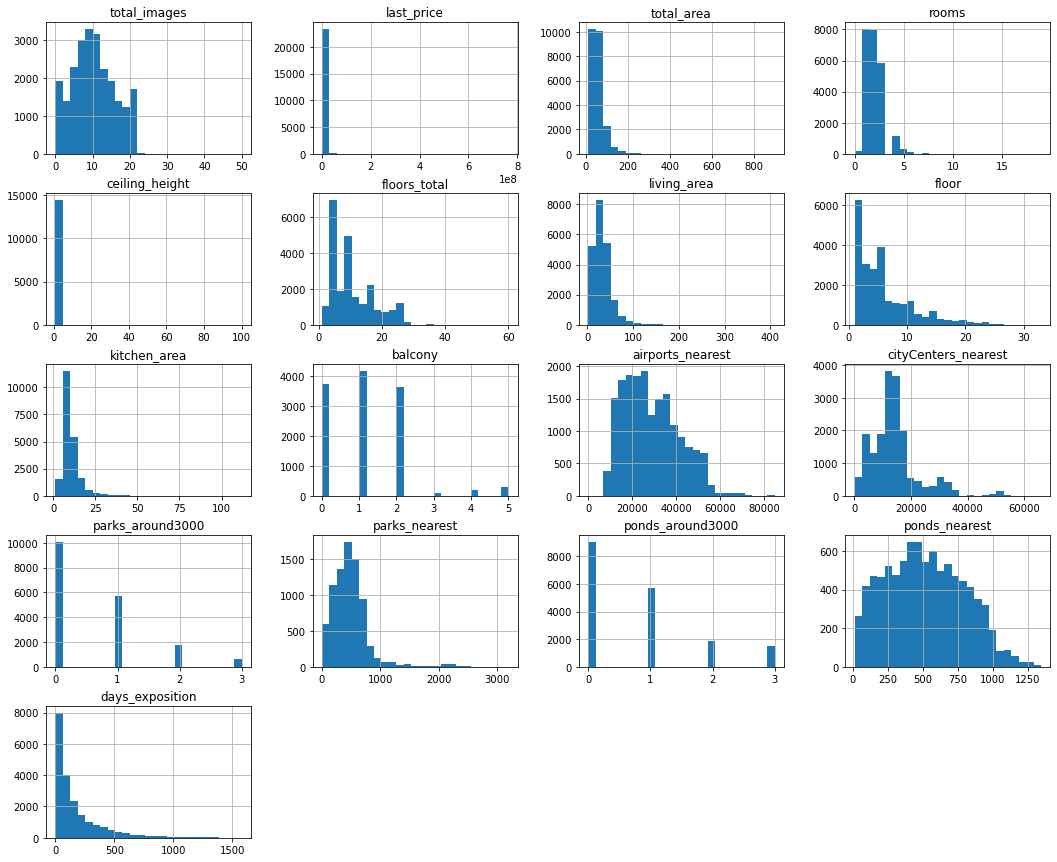

In [32]:
data.hist(figsize=(18,15), bins=25)
plt.show()

По этим графикам пока сложно что-то говорить (ну, по большей мере выкладывают по 8-12 фото квартиры, общая площадь большинства квартир менее $100 м^2$ , в квартире в осносном 2, 3 комнаты, этаж чаще всего ниже 10 и т.д.). Некоторые распределения отдаленно напоминают распределение Пуассона (допустим, days_exposition, floor, parks_around) иои нормальное (total_images, ponds_nearest). Явно есть выбросы в ceiling_height, rooms, last_price, total_images (хотя 50 фото может кто-то и выкладывает). Также не совсем непонятны высокие значения площадей (если это не дворцы): надо бы посмотреть совпадают ли строки, где зафиксированы высокие значения по площадям (заодно и числу комнат - может, действительно дворцы по  $800 м^2$ и 20 комнат).

In [33]:
data_aux = data.query('total_area > 250')
display(data_aux.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
155,8,96000000.0,317.0,2017-07-07T00:00:00,4,3.50,3.0,183.0,3,NaN,False,False,NaN,1.0,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8.0,159.5,7,NaN,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
581,20,65000000.0,365.0,2019-03-18T00:00:00,7,2.90,7.0,NaN,7,NaN,False,False,NaN,NaN,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN
660,3,49950000.0,483.9,2017-10-04T00:00:00,7,3.20,6.0,312.5,4,NaN,False,False,26.4,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
793,20,135000000.0,310.0,2018-05-22T00:00:00,4,3.30,5.0,250.0,2,NaN,False,False,50.0,NaN,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0
866,5,25000000.0,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,False,False,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.0,3,NaN,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1085,16,75000000.0,323.0,2017-07-10T00:00:00,5,4.00,5.0,255.7,4,NaN,False,False,66.0,NaN,Санкт-Петербург,23713.0,594.0,3.0,398.0,2.0,515.0,259.0
1188,20,118000000.0,290.6,2018-06-01T00:00:00,6,3.82,6.0,188.7,3,NaN,False,False,22.0,1.0,Санкт-Петербург,25309.0,6224.0,1.0,217.0,0.0,NaN,316.0
1300,14,120000000.0,280.0,2018-07-12T00:00:00,5,4.70,4.0,162.0,3,NaN,False,False,30.0,NaN,Санкт-Петербург,24680.0,4247.0,1.0,464.0,3.0,339.0,225.0


Действительно, где общая площадь большая, там и жилая площадь немаленькая (как и площадь кухонь в принципе), удалять или усреднять не будем: **похоже на реальность**. Тогда и большие значения числа комнат оставляем в покое. Работать с такими "выдающимися" значениями, конечно, неудобно, поэтому возможно просто потом их в отдебльную группу выделим или сделаем переменную, где обойдемся без них. А из исходной таблицы сделаем такую, где самых грубых выбросов нет.

### Поиск выбросов 

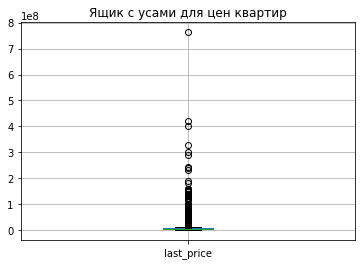

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,NaN,False,False,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,False,False,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,False,False,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,False,False,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
22831,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6.0,63.7,6,NaN,False,False,30.2,NaN,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN


In [34]:
data.boxplot(column='last_price')
plt.title('Ящик с усами для цен квартир')
plt.show()
display(data.query('last_price > 2.5e8'))

Также видно, что есть несколько слишком больших выбросов (значения то может и реальны, но их лучше выделить, убрать куда-то, чтобы они сильно не завышали общие показатели)

In [35]:
unst_data = data.query('300_000 > last_price > 2.5e8\
                       or total_area > 300\
                       or rooms >= 10')
#st_data = data.loc[~ data[].isin(unst_data),]
st_data = data.query('300_000 < last_price <= 2.5e8\
                       and total_area <= 300\
                       and rooms < 10')

st_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23628 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23628 non-null  int64  
 1   last_price            23628 non-null  float64
 2   total_area            23628 non-null  float64
 3   first_day_exposition  23628 non-null  object 
 4   rooms                 23628 non-null  int64  
 5   ceiling_height        14455 non-null  float64
 6   floors_total          23542 non-null  float64
 7   living_area           21738 non-null  float64
 8   floor                 23628 non-null  int64  
 9   is_apartment          2769 non-null   object 
 10  studio                23628 non-null  bool   
 11  open_plan             23628 non-null  bool   
 12  kitchen_area          21363 non-null  float64
 13  balcony               12146 non-null  float64
 14  locality_name         23579 non-null  object 
 15  airports_nearest   

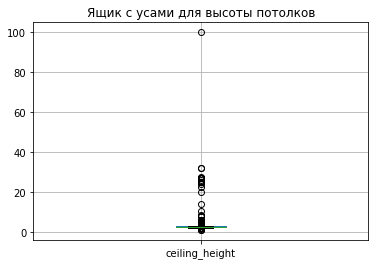

count    14455.000000
mean         2.769184
std          1.262080
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [36]:
st_data.boxplot(column='ceiling_height')
plt.title('Ящик с усами для высоты потолков')
plt.show()
st_data['ceiling_height'].describe()

Потолков с высотой 100 м явно нет (возможно тут 0 слишком сильно при вводе зажали), но и значения в 7, 10 м тоже странны... Заменим их на медианные.

In [37]:
st_data.loc[data['ceiling_height'] > 8, 'ceiling_height'] = st_data['ceiling_height'].median()

Значения заполним, когда будем работать с пропусками

**Выводы**
Сделаны предварительные исследования, из которых понятно, что:
- в некоторых столбцах были выбросы (видно по гистограммам, от которых мы избавились, выделив переменную для дальнейшей работы;
- имеются пропуски в ряде важных столбцов, типа площадей (жилая, кухни) или наличия центра рядом

## Предобработка данных

Найдем пропуски:

In [38]:
st_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9173
floors_total               86
living_area              1890
floor                       0
is_apartment            20859
studio                      0
open_plan                   0
kitchen_area             2265
balcony                 11482
locality_name              49
airports_nearest         5538
cityCenters_nearest      5517
parks_around3000         5516
parks_nearest           15596
ponds_around3000         5516
ponds_nearest           14565
days_exposition          3165
dtype: int64

Их немало. Посмотрим, что можно сделать в каждом из столбцов (попытаемся везде заполнить чем-то, а входе расчетов, если что вернемся к исходному варианту):
- ceiling_height, очевидно пользователь не захотел указывать высоту потолка (это явно не главный параметр, на который обращает внимание покупатель, хотя для кого-то и важный), наверное, здесь можно заполнить медианой - однако согласно гистограмме в колонке есть аномалии, сначала придется разобраться с ними;
- floors_total, пропусков очень ммало, поэтому возможно их следует и нетрогать, но ввиду соображений изложенных выше заполним медианой, предварительно изучив выбросы;
- living_area, kitchen_area показатели важные, лучше заполнить медианой, средним;
- is_apartment, скорее всего стоит заменить на False, т.к. по смыслу подходит, что таких квартир мало;
- balcony, заменим на 0;
- locality_name, заменим на unknown;
- airports_nearest, cityCenters_neares, скорее всего, либо просто аэропорта поблизости нет (а для маленького города и как таковой центр не найти, если апперировать общими понятиями, а не геометрией - однако в СПБ явно расстояние до центра по разным показателям то вычислить можно), либо пользователь не видит смысл высчитывать эти показатели. Не будем здесь ничем заменять;
- parks_nearest, ponds_nearest много пропусков, скорее всего по той же причине, что и описана выше. Возможно, что есть вариант заменить чем-то на основе ponds_around3000 и parks_around3000, потому что в них пропусков явно меньще;
- ponds_around3000, parks_around3000, здесь если и менять, то на 0. Просто в таком радиусе нет данных объектов.



Выполним описанные замены, но предварительно разберемся с дубликатами


In [39]:
#функции для "борьбы" с посе(ё)лками и "городскими типами"
def remove_township_type(value):    
    if (('сел' in value) or ('сёл' in value)) and ('городск' not in value):
        if ('поселок' in value):
            value = value.replace("поселок ", "")
        if ('посёлок' in value):
            value = value.replace("посёлок ", "")
        if ('село' in value):
            value = value.replace("село ", "")
        return "поселок " + value
    else:
        return value

def remove_urban_village_type(value2):
    if ('городск' in value2):
        if ('городской' in value2):
            value2 = value2.replace("городской поселок ", "")
        if ('поселок городского типа' in value2):
            value2 = value2.replace("поселок городского типа ", "")
        if ('городской посёлок' in value2):
            value2 = value2.replace("городской посёлок ", "")
        if ('посёлок городского типа' in value2):
            value2 = value2.replace("посёлок городского типа ", "")
        if ('деревн' in value2):
            return ('деревня')
        return 'поселок городского типа ' + value2
    else:
        return value2
    
# функция для категоризации населенных пунктов
def categorize_locality(value3):
    if ('сел' in value3):
        if ('городск' in value3):
            return "пгт"
        else:
            return "поселки"
    elif 'дер' in value3:
        return "деревни"
    elif 'товарищ' in value3:
        return "товарищества"
    elif 'unknown' in value3:
        return "неизвестно"
    else:
        return "города"

st_data.duplicated().sum() # явных дубликатов нет
# перейдем к столбцу с названием населенного пункта
st_data['locality_name'] = st_data['locality_name'].fillna('unknown')

# проверка на строки-дубликаты
st_data['locality_name'] = st_data['locality_name'].apply(remove_township_type)
st_data['locality_name'] = st_data['locality_name'].apply(remove_urban_village_type)

# нас. пункты удобно  разбить по категориям
st_data['locality_group'] = st_data['locality_name'].apply(categorize_locality)

st_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_group
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,города
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселки
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,города
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,города
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,города


In [40]:
# дальше меняем пропуски на значения, которые по нашему пониманию ближе всего к правде
st_data['balcony'] = st_data['balcony'].fillna(0)
st_data['is_apartment'] = st_data['is_apartment'].fillna(False)
st_data['floors_total'] = st_data['floors_total'].fillna(st_data['floor'])



C высотой потолков сложнее, поэтому поищем корреляцию с другими данными и попробуем разбиить на группы, если корреляция с чем-то будет нормальная (желательно больше 0.4)

In [41]:
for col in st_data.columns:
    try:
        corr_coef = st_data['ceiling_height'].corr(st_data[col])
        if corr_coef > 0.4:
            print(col, corr_coef)
    except:
        print('Другой тип данных')

last_price 0.4378439158812599
total_area 0.47155610369205736
Другой тип данных
ceiling_height 1.0
living_area 0.4341681291786696
Другой тип данных
Другой тип данных


Больше 0.4 несколько значений, однако выберем самое весомое и по нему выполним категоризацию (площадь переменная, конечно, количественная, но по ней фвно можно выделить маленькие или большие квартиры).

In [42]:
def total_ar_categor(col):
    if col <= 35:
        return "very_small"
    elif col <= 60:
        return "small"
    elif col <= 100:
        return 'middle'
    elif col <= 180:
        return 'big'
    else:
        return 'large'
    
st_data['flat_area_group'] = st_data['total_area'].apply(total_ar_categor)

Теперь можно по разбитым на группы категориям, посчитать медиану в каждой и этим значением заполнить пропуски в ceiling_height

In [43]:
st_data['ceiling_height'] = st_data.groupby(['flat_area_group','locality_group'], sort=False)['ceiling_height'].apply(lambda val: val.fillna(val.median()))
display(st_data['ceiling_height'].head(8))
#st_data['ceiling_height'].isna().sum()

0    2.70
1    2.60
2    2.60
3    3.00
4    3.03
5    2.60
6    2.60
7    2.75
Name: ceiling_height, dtype: float64

Также произвежем замену значений в пллощади кухни и жилой площади.

In [44]:
st_data['kitchen_area'] = st_data.groupby(['flat_area_group','locality_group'], sort=False)['kitchen_area'].apply(lambda val: val.fillna(val.median()))
st_data['living_area'] = st_data.groupby(['flat_area_group', 'locality_group'], sort=False)['living_area'].apply(lambda val: val.fillna(val.median()))

st_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_group,flat_area_group
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,города,big
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.60,11.0,18.60,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселки,small
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.60,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,города,small
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,3.00,14.0,71.70,9,False,False,False,16.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,города,big
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,города,middle
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,False,False,9.10,0.0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,пгт,very_small
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.60,26.0,10.60,6,False,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,поселки,small
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.75,24.0,43.90,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,города,middle
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.43,26,False,False,False,8.81,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,поселки,very_small
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,города,middle


In [45]:
st_data.loc[st_data['cityCenters_nearest'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_group,flat_area_group
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,False,False,9.10,0.0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,пгт,very_small
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.43,26,False,False,False,8.81,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,поселки,very_small
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,False,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0,города,small
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,деревни,small
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.55,9.0,17.00,2,False,False,False,6.90,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,города,very_small


Взглянув на эти данные можно сказать, что у ПГТ и городов то точно есть центры и их бы нужно опр-ть (но вот данных кажется маловоато), а вот в деревнях и т.п. можно либо 0 (что не очень по факту логично) влепить либо оставить как есть (центр как таковой в поселке или деревне в негеометрическом плане понятие отсутств-ее, название столбца об этом тоже намекает). Ближайшие расстоияния до парков и прудов тоже геометрически то есть в любом случае, но они могут быть в другом соседнем нас. пунтке (километрах эдак в 30)... Тоже самое с аэропортами (если аоселок не под СПБ в районе пары километров, то и аэропорта там поблизости нет попросту).

По паркам можно исходить из предположения, что в деревнях и поселках все-таки леса, а парков нет как таковых и поставить 0 только в этих нас. пунктах, но придержимся общей логики и ставим 0 везде (как и в парках)

In [46]:
st_data['ponds_around3000'] = st_data['ponds_around3000'].fillna(0)
st_data['parks_around3000'] = st_data['parks_around3000'].fillna(0)
st_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              4
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5538
cityCenters_nearest      5517
parks_around3000            0
parks_nearest           15596
ponds_around3000            0
ponds_nearest           14565
days_exposition          3165
locality_group              0
flat_area_group             0
dtype: int64

4 пропуска в ceiling_height роли не сыграют.


In [47]:
# поменяем тип значений в столбце первого дня публикации
st_data['first_day_exposition'] = pd.to_datetime(st_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
st_data[['living_area','total_area', 'kitchen_area', 'ceiling_height']] = st_data[['living_area','total_area', 'kitchen_area', 'ceiling_height']].astype('float32')
st_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23628 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23628 non-null  int64         
 1   last_price            23628 non-null  float64       
 2   total_area            23628 non-null  float32       
 3   first_day_exposition  23628 non-null  datetime64[ns]
 4   rooms                 23628 non-null  int64         
 5   ceiling_height        23624 non-null  float32       
 6   floors_total          23628 non-null  float64       
 7   living_area           23628 non-null  float32       
 8   floor                 23628 non-null  int64         
 9   is_apartment          23628 non-null  bool          
 10  studio                23628 non-null  bool          
 11  open_plan             23628 non-null  bool          
 12  kitchen_area          23628 non-null  float32       
 13  balcony         

## Добавление в таблицу новых полей

Для категоризации этажей также пользуемся функцией.

In [48]:
#data['floor'].unique()
def categorize_floor(row):
    value = row['floor']
    floors_total = row['floors_total']
    if value == 1:
        return 'первый'
    elif value == floors_total:
        return 'последний'
    elif (value != floors_total) and (value != 1):
        return 'другой'
        

In [49]:
st_data['one_meter_price'] = st_data['last_price'] / st_data['total_area']
st_data['post_day_number'] = st_data['first_day_exposition'].dt.dayofweek
st_data['post_month_number'] = pd.DatetimeIndex(st_data['first_day_exposition']).month
st_data['post_year_number'] = pd.DatetimeIndex(st_data['first_day_exposition']).year
st_data['floor_category'] = st_data.apply(categorize_floor, axis=1)
st_data['cityCenters_distance_km'] = round(st_data['cityCenters_nearest'] / 1000)


После добавления, указанных в задании столбцов, перейдем к описанию данных. Со многими мы уже разбирались в предварительной обработке данных: допустим, общая площадь. Ее нетрудно, введу простых предположений поделить на категории, что мы и сделали.

flat_area_group
big            1525
large           240
middle         6715
small         11626
very_small     3522
Name: total_area, dtype: int64

locality_group  flat_area_group
города          big                1482
                large               235
                middle             5852
                small              9539
                very_small         2772
деревни         big                   8
                large                 2
                middle              200
                small               551
                very_small          182
неизвестно      big                   6
                middle               22
                small                16
                very_small            5
пгт             big                   6
                middle              125
                small               319
                very_small          100
поселки         big                  23
                large                 3
                middle              515
                small              1197
                very_small          463
товарищества    middle                1
        

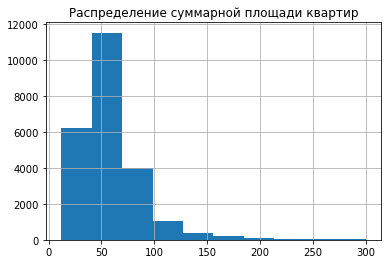

In [50]:
display(st_data.groupby('flat_area_group')['total_area'].count())
display(st_data.groupby(['locality_group','flat_area_group'])['total_area'].count())
st_data['total_area'].describe()

st_data['total_area'].hist()
plt.title('Распределение суммарной площади квартир')
plt.show()


Видим, что больше всего квартир маленьких (от 35 до 60 квадратов в нашей классификации), что вполне соответсвует реальным представлениям. Стоит упомянуть, что этот показатель хорошо коррелирует с жилой площадью и площадью кухни. Практически в любом типе нас. пунктов маленьких квартир продается столько же, сколько всех остальных вместе взятых.

## Проведение углубленного исследовательского анализа данных

Корреляция между жилой площадью и площадью кухни 0.4004571838626311


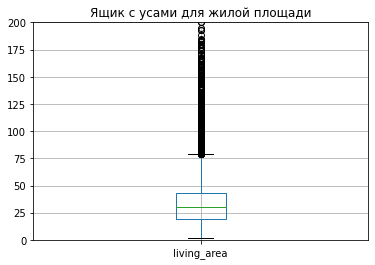

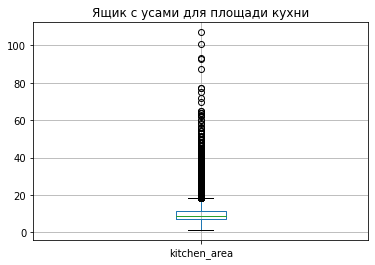

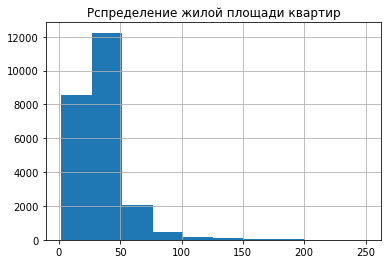

In [51]:
print('Корреляция между жилой площадью и площадью кухни', st_data['living_area'].corr(st_data['kitchen_area']))
# жилая площадь и площадь кухонь также неплохо коррелируют
plt.ylim(0,200)
st_data.boxplot(column='living_area')
plt.title('Ящик с усами для жилой площади')
plt.show()

st_data.boxplot(column='kitchen_area')
plt.title('Ящик с усами для площади кухни')
plt.show()
st_data['living_area'].hist()
plt.title('Рспределение жилой площади квартир')
plt.show()

**Промежуточные выводы**

- размах значений достаточно небольшой (по графику примерно 18-23 м^2 - близко к значению общей площади)
- видно, что подавляющее большинство (учитывая величину 1,5 IQR) вписывается в 80 м^2
- это все лишь подтверждает линейную зависимость жилой площади от общей площади 
- большинтсво кухонь по факту вне зависимости от общей площади имеют площадь до 20 м^2

Переходим к ценне жилья

last_price                            rooms  \
                                    count      median          mean median   
locality_group flat_area_group                                               
города         big                   1482  14534631.5  1.808244e+07    4.0   
               large                  235  29000000.0  4.135755e+07    5.0   
               middle                5852   7250000.0  7.974913e+06    3.0   
               small                 9539   4410000.0  4.558772e+06    2.0   
               very_small            2772   3200000.0  3.193231e+06    1.0   
деревни        big                      8   9250000.0  9.253688e+06    3.5   
               large                    2  15647600.0  1.564760e+07    5.5   
               middle                 200   4589300.0  4.690214e+06    3.0   
               small                  551   2950000.0  2.956587e+06    2.0   
               very_small             182   2600000.0  2.511940e+06    1.0   
неизвестно     big                      6  13970000.0  1.423536e+07    3.0   
               middle                  22   6173775.0  7.172490e+06    3.0   
               small                   16   4325000.0  4.503771e+06    2.0   
               very_small               5   3000000.0  3.049185e+06    1.0   
пгт            big                      6   4990496.0  4.746832e+06    4.0   
               middle                 125   3500000.0  3.592931e+06    3.0   
               small                  319   2500000.0  2.484928e+06    2.0   
               very_small             100   1710000.0  1.845619e+06    1.0   
поселки        big                     23   7450000.0  8.585139e+06    4.0   
               large                    3  15500000.0  1.373333e+07    4.0   
               middle                 515   4900000.0  4.833073e+06    3.0   
               small                 1197   3300000.0  3.259787e+06    1.0   
               very_small             463   2600000.0  2.550955e+06    1.0   
товарищества   middle                   1   1400000.0  1.400000e+06    3.0   
               small                    4   2225000.0  2.287500e+06    2.0   

                                         ceiling_height            
                                    mean         median      mean  
locality_group flat_area_group                                     
города         big              3.670715          3.000  3.040034  
               large            5.085106          3.300  3.316681  
               middle           2.744703          2.750  2.787662  
               small            1.747038          2.600  2.637203  
               very_small       0.964286          2.550  2.582071  
деревни        big              3.750000          2.925  2.893750  
               large            5.500000          2.725  2.725000  
               middle           2.710000          2.700  2.688600  
               small            1.562613          2.600  2.622559  
               very_small       0.912088          2.700  2.706209  
неизвестно     big              2.666667          2.875  2.875000  
               middle           2.909091          3.100  3.140909  
               small            1.812500          2.725  2.748125  
               very_small       1.000000          2.675  2.675000  
пгт            big              4.000000          2.750  2.766667  
               middle           2.880000          2.600  2.641600  
               small            1.855799          2.550  2.581724  
               very_small       0.980000          2.600  2.593100  
поселки        big              3.956522          2.650  2.713913  
               large            5.000000            NaN       NaN  
               middle           2.646602          2.635  2.644223  
               small            1.541353          2.600  2.610635  
               very_small       0.922246          2.600  2.610842  
товарищества   middle           3.000000            NaN       NaN  
          

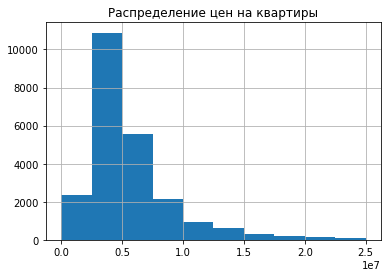

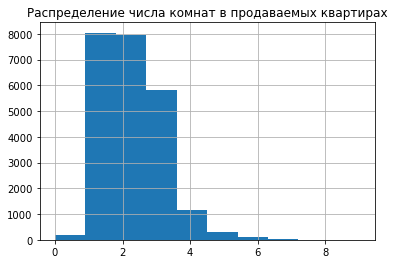

In [52]:
#print(st_data['last_price'].corr(st_data['total_area']))
# линейность прослеживается явно
display(st_data.groupby(['locality_group','flat_area_group']).agg\
        ({'last_price': ['count', 'median', 'mean'],\
         'rooms': ['median', 'mean'],\
         'ceiling_height': ['median', 'mean']}))


st_data['last_price'].hist(range=(0, 2.5e7))
plt.title('Распределение цен на квартиры')
plt.show()
st_data['rooms'].hist()
plt.title('Распределение числа комнат в продаваемых квартирах')
plt.show()

**Промежуточные выводы**

- по гистограмме можно сказать, что больше всего квартир **ценой от 2,5 до 7,5 млн** выкладываются в объявлениях
- отметим, что у средних и ниже по площади квартир хорошая сходимость среднего арифм. и медианы (значит не зря некоторые значения были выброшены в начале). А то, что разброс у больших и очень больших квартир выше легко объсняется тем, что в эти группы и значений меньше попадает, и сами они в "площадном" диапазоне укрупнены
- в целом в больших и очень больших квартирах в любой квартире имеется больше 4 комнат, в средних - 3, в маленьких - 2
- в городах достаточно ощутима разница высоты потолков у больших по площади квартир и маленьких (0,4 м)
- ну, и главное - цена. В городах большие по площади квартиры стоят мягко говоря таких же денег. **При этом цена в деревнях и поселках на схожую по площади недвижимсоть ниже в диапазоне от 3 до 10 млн, что весьма существенно**. Это можно сказать и о других типах по площади. Цена квартир средней площади дешевле больших в 1,5 - 2 раза.

floor                   floors_total           
                               count median       mean       median       mean
locality_group flat_area_group                                                
города         big              1482    4.0   5.743590          7.0   9.709852
               large             235    4.0   5.034043          6.0   7.195745
               middle           5852    4.0   5.878332          9.0  10.917635
               small            9539    4.0   5.806269          9.0  10.558549
               very_small       2772    4.0   5.566739          9.0  10.107143
деревни        big                 8    3.5   6.750000          4.0   7.625000
               large               2    1.5   1.500000          2.0   2.000000
               middle            200    4.0   6.190000         10.0  11.290000
               small             551    4.0   5.442831          9.0  10.163339
               very_small        182    5.0   7.247253         12.0  12.521978
неизвестно     big                 6    2.5   3.000000          5.0   4.833333
               middle             22    2.0   4.954545          7.0   9.409091
               small              16    3.5   5.250000          5.0   8.812500
               very_small          5    7.0  11.200000         23.0  18.200000
пгт            big                 6    3.0   3.166667          5.0   5.833333
               middle            125    3.0   3.264000          5.0   5.720000
               small             319    3.0   3.595611          5.0   6.012539
               very_small        100    3.0   3.580000          5.0   6.000000
поселки        big                23    4.0   4.217391          6.0   6.956522
               large               3    2.0   3.000000          5.0   4.000000
               middle            515    5.0   7.318447         10.0  13.180583
               small            1197    5.0   7.293233         10.0  13.176274
               very_small        463    6.0   8.440605         17.0  15.159827
товарищества   middle              1    2.0   2.000000          4.0   4.000000
               small               4    4.0   4.250000          7.0   6.500000

locality_group  floor_category
города          другой            14689
                первый             2385
                последний          2806
деревни         другой              659
                первый              134
                последний           150
неизвестно      другой               37
                первый                5
                последний             7
пгт             другой              306
                первый              123
                последний           121
поселки         другой             1635
                первый              263
                последний           303
товарищества    другой                3
                первый                1
                последний             1
Name: floor, dtype: int64

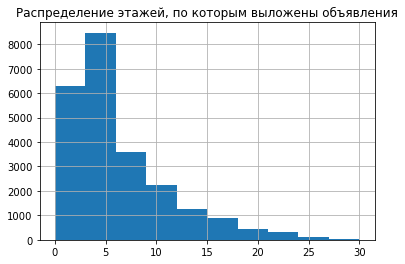

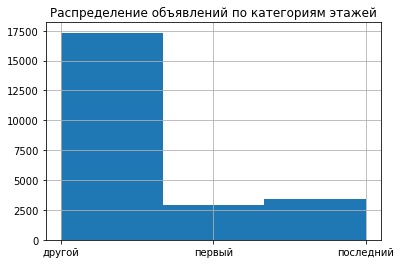

In [53]:
display(st_data.groupby(['locality_group','flat_area_group']).agg\
        ({'floor': ['count', 'median', 'mean'],\
         'floors_total': ['median', 'mean']}))
# Поменяем групппировку, чтобы отследииь в каком нас. пункте, какие типы этажей встречаются чаще
display(st_data.groupby(['locality_group', 'floor_category'])['floor'].count())

st_data['floor'].hist(range=(0, 30))
plt.title('Распределение этажей, по которым выложены объявления')
plt.show()
st_data['floor_category'].hist(bins=3)
plt.title('Распределение объявлений по категориям этажей')
plt.show()

**Промежуточные выводы**


- в деревнях есть тип этажей другой... Весьма странно, однако возможно так размечали данные. Также имеются дома с числом этажей равным 10. Деревни похожк очень современные...
- в городах стараются покупать 4-5 этаж в семи/девятиэтажках.
- в пгт в основном продают третий этаж при том что дом - пяти/шестиэтажка
- объвлений по "дргим" этажам явно больше, чем по первому и последнему, что в принципе и так ясно
- по гистограмме заметно, что чем выше этаж, тем меньше объявлений о продаже можно найти


In [54]:
st_data.loc[st_data['locality_group'] == 'деревни']['locality_name'].unique()
# сделал проверку по деревням погуглил картинки - есть и многоэтажки в таковых...

array(['деревня Кудрово', 'деревня Фёдоровское',
       'деревня Новое Девяткино', 'деревня Пикколово', 'деревня Куттузи',
       'деревня Заклинье', 'деревня Старая', 'деревня Лесколово',
       'деревня Оржицы', 'деревня Кальтино', 'деревня Нурма',
       'деревня Лопухинка', 'деревня Кипень', 'деревня Келози',
       'деревня Вартемяги', 'деревня Агалатово', 'деревня Лаголово',
       'деревня Белогорка', 'деревня Большие Колпаны', 'деревня Горбунки',
       'деревня Батово', 'деревня Заневка', 'деревня Иссад',
       'деревня Мистолово', 'деревня Разметелево', 'деревня Пеники',
       'деревня Пудомяги', 'деревня Низино', 'деревня Бегуницы',
       'деревня Колтуши', 'деревня Гостилицы', 'деревня Малое Карлино',
       'деревня Аро', 'деревня Малое Верево', 'деревня Извара',
       'деревня Калитино', 'деревня Чудской Бор', 'деревня Мины',
       'деревня Коркино', 'деревня Рабитицы', 'деревня Кузьмолово',
       'деревня Малые Колпаны', 'деревня Меньково',
       'деревня Старые Б

In [55]:
display(st_data.groupby(['locality_group','flat_area_group']).agg\
        ({'cityCenters_nearest': ['count', 'median', 'mean'],\
         'parks_nearest': ['median', 'mean'],\
         'ponds_nearest': ['median', 'mean']}))

cityCenters_nearest                         \
                                             count   median          mean   
locality_group flat_area_group                                              
города         big                            1433   5961.0   8583.912073   
               large                           232   5034.5   7062.810345   
               middle                         5182  12169.5  12726.445195   
               small                          8018  13417.0  14827.200299   
               very_small                     2280  14038.0  15996.872368   
деревни        big                               0      NaN           NaN   
               large                             0      NaN           NaN   
               middle                            0      NaN           NaN   
               small                             0      NaN           NaN   
               very_small                        0      NaN           NaN   
неизвестно     big                               6   4161.5  14088.666667   
               middle                           17   5382.0   9146.470588   
               small                            14   9220.0  11590.571429   
               very_small                        4  17078.5  15036.250000   
пгт            big                               0      NaN           NaN   
               middle                            0      NaN           NaN   
               small                             0      NaN           NaN   
               very_small                        0      NaN           NaN   
поселки        big                              16  30367.5  29577.312500   
               large                             3  24004.0  22891.000000   
               middle                          267  23468.0  23923.097378   
               small                           497  19942.0  23154.849095   
               very_small                      142  22639.0  23434.753521   
товарищества   middle                            0      NaN           NaN   
               small                             0      NaN           NaN   

                               parks_nearest             ponds_nearest  \
                                      median        mean        median   
locality_group flat_area_group                                           
города         big                     441.0  470.750823         438.0   
               large                   412.0  465.955128         391.5   
               middle                  458.0  503.499406         496.0   
               small                   460.0  492.425358         518.0   
               very_small              433.0  474.827338         520.5   
деревни        big                       NaN         NaN           NaN   
               large                     NaN         NaN           NaN   
               middle                    NaN         NaN           NaN   
               small                     NaN         NaN           NaN   
               very_small                NaN         NaN           NaN   
неизвестно     big                     547.0  521.333333         463.0   
               middle                  410.5  404.000000         454.0   
               small                   591.5  588.750000         513.0   
               very_small                NaN         NaN         272.0   
пгт            big                       NaN         NaN           NaN   
               middle                    NaN         NaN           NaN   
               small                     NaN         NaN           NaN   
               very_small                NaN         NaN           NaN   
поселки        big                       NaN         NaN         630.0   
               large                     NaN         NaN         969.0   
               middle                  748.0  693.700000         594.0   
               small                   733.0  579.111111         593.0   
               very_smal


**Промежуточные выводы**

- получается, что крупные объекты недвижимости в городах (по площади квартиры) находятся чаще всего ближе к центру Санкт-Петербурга. Это легко объясняется тем, что в выборке преимущественно объекты из самого СПб, а там как раз самые крупные возможно и ближе к центру. Логично, что на переферии  строятся дома с квартирами меньшего размера. В деревнях и пгт как раз получилось, что это расстояние никто не указывает
- расстояния до ближайшего парка, пруда везде небольшие (до 1 км)

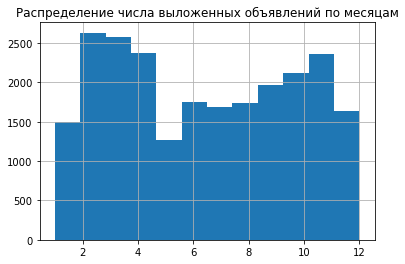

In [56]:
st_data['post_month_number'].hist(bins=12)
plt.title('Распределение числа выложенных объявлений по месяцам')
plt.show()

**Промежуточные выводы**

Видно, что летом число выложенных объявлений поменьше. А больше всего весной и осенью

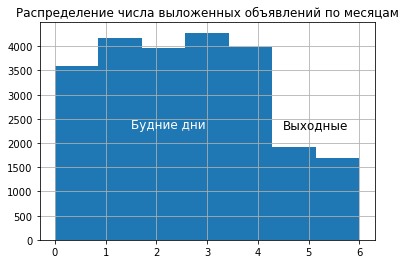

In [57]:
st_data['post_day_number'].hist(bins=7)
plt.text(4.5, 2300, "Выходные", fontsize=12)
plt.text(1.5, 2300, "Будние дни", fontsize=12, color='white')
plt.title('Распределение числа выложенных объявлений по месяцам')
plt.show()

**Промежуточные выводы**

В выходные выкладывают объявлений меньше.

Изучаем столбец с временем нахождения публикации в виде объявления

count    20463.000000
mean       180.584225
std        219.337226
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


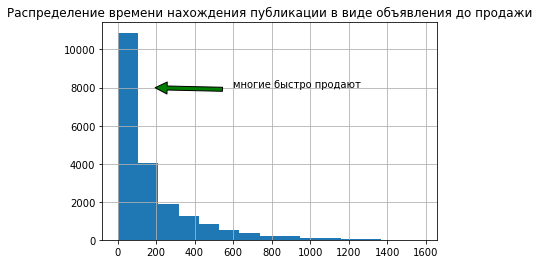

days_exposition                   
                                         count median        mean
locality_group flat_area_group                                   
города         big                        1116  191.0  293.067204
               large                       182  197.0  313.521978
               middle                     4878  114.0  204.858139
               small                      8479   85.0  163.387428
               very_small                 2497   68.0  141.124549
деревни        big                           8  128.0  143.125000
               large                         2  290.5  290.500000
               middle                      170   98.5  180.958824
               small                       482  104.5  198.029046
               very_small                  171   93.0  195.491228
неизвестно     big                           6  283.5  226.666667
               middle                       21  278.0  319.571429
               small                        16   91.0  138.937500
               very_small                    5  140.0  232.200000
пгт            big                           4  164.5  290.750000
               middle                       97  122.0  190.051546
               small                       261  104.0  170.858238
               very_small                   86   80.5  152.220930
поселки        big                          16  184.5  220.562500
               large                         1   35.0   35.000000
               middle                      450  107.5  187.864444
               small                      1080   84.0  156.546296
               very_small                  431   78.0  154.004640
товарищества   middle                        1  109.0  109.000000
               small                         3   45.0  119.666667

In [58]:
st_data['days_exposition'].hist(bins=15)
plt.title('Распределение времени нахождения публикации в виде объявления до продажи')
print(st_data['days_exposition'].describe())
plt.annotate("многие быстро продают", xy=(150, 8000), xytext=(600, 8000),\
            arrowprops=dict(facecolor='green', shrink=0.1))
plt.show()
display(st_data.groupby(['locality_group','flat_area_group']).agg\
        ({'days_exposition': ['count', 'median', 'mean']}))

**Промежуточные выводы**

В общем квартиры висят в объявлениях около 90-200 дней (большая масса). Это хорошо показывают и данные по общей выборке и в группах. В большинстве групп маленькие квартиры висят как раз сравнительно недолго (68-110 дней по медиане). В городах раскупаются быстрее, чем в деревнях.

- в среднем в городе, чтобы продать "крупную" недвижимость нужно около 200 дней, а в пгт, поселках, деревнях поменьше
- маленькие или очень маленькие квартиры продаются в среднем раза в два быстрее

Про общую стоимость мы немного говорили, однако теперь поподробнее


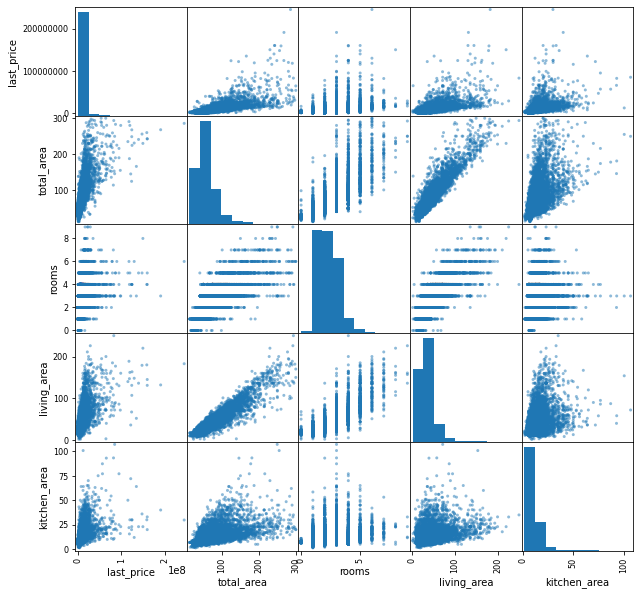

Корреляция цены на момент продажи с last_price составляет 0.9999999999999999.
И это достаточно большое значение, чтобы говорить о хорошей линейной взаимосвязи
Корреляция цены на момент продажи с total_area составляет 0.7106489484633541.
И это достаточно большое значение, чтобы говорить о хорошей линейной взаимосвязи
Корреляция цены на момент продажи с rooms составляет 0.42011365200206746.
Корреляция цены на момент продажи с living_area составляет 0.6260576090187623.
И это достаточно большое значение, чтобы говорить о хорошей линейной взаимосвязи
Корреляция цены на момент продажи с kitchen_area составляет 0.5360693503380594.
Корреляция цены на момент продажи с post_day_number составляет -0.006275694211194786.
Корреляция цены на момент продажи с post_month_number составляет 0.004852941963950083.
Корреляция цены на момент продажи с post_year_number составляет -0.05590570509896681.
Другой тип данных


In [59]:
data_price_corr = st_data.loc[:, ['last_price', 'total_area', 'rooms', 'living_area', 'kitchen_area', 'post_day_number', 'post_month_number', 'post_year_number', 'floor_category']]
pd.plotting.scatter_matrix(data_price_corr.loc[:, 'last_price':'kitchen_area'], figsize=(10, 10))
plt.show()
# однозначно у цены есть зависимости с другими величинами (линейность к более высоким значениям падает)
#  из-за масштаба last_price удобнее посмотреть на числовые параметры
for col in data_price_corr.columns:
    try:
        corr_coef = st_data['last_price'].corr(st_data[col])
        print(f'Корреляция цены на момент продажи с {col} составляет {corr_coef}.')
        if corr_coef > 0.6:
            print('И это достаточно большое значение, чтобы говорить о хорошей линейной взаимосвязи')
    except:
        print('Другой тип данных')


Корреляция с общей площадью и жилой высокая, что вполне сходится с нашими бытовыми предположениями. Но и от площади кухонь, как и числа комнат зависимость также наблюдается. Линейной корреляции с днями публикации (как и месяцами с годом) и ценой явно нет

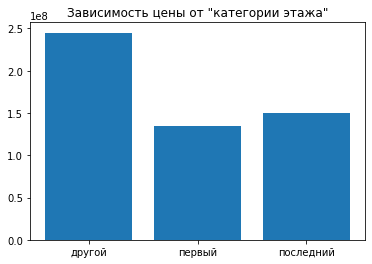

In [60]:
plt.bar(data_price_corr['floor_category'], data_price_corr['last_price'])
plt.title('Зависимость цены от "категории этажа"')
plt.show()

Разберемся с топ-10 нас. пунктов по числу наблюдений:

In [61]:
top_locality = st_data['locality_name'].value_counts().head(10)
st_data_top = st_data[st_data['locality_name'].isin(top_locality.index)]
st_data_top['one_meter_price'] = st_data_top['last_price'] / st_data_top['total_area']
display(st_data_top['one_meter_price'].describe())
sorted_top = st_data_top.sort_values(by='one_meter_price', ascending=False)
# последнее значение слишком маленькое, чтобы  в него поверить, его еще вначале скорее всего стоили отнести к аномальным
print("Нас. пункт с максимальной стоимостью жилья:", sorted_top.loc[4996, 'locality_name'])
print("Нас. пункт с минимальной стоимостью жилья:", sorted_top.loc[23477, 'locality_name'])


count     18922.000000
mean     108469.519181
std       44701.074189
min       10507.246377
25%       86049.514234
50%      100386.679486
75%      119732.684170
max      995983.935743
Name: one_meter_price, dtype: float64

Нас. пункт с максимальной стоимостью жилья: Санкт-Петербург
Нас. пункт с минимальной стоимостью жилья: Гатчина


**Средняя стоимость квадратного метра жилья - чуть более 100 тыс рублей.** При возможности платить 108 тыс $\pm$ 45 тысяч рублей за квадратный метр, человек может купить себе практически любой из предложенных вариантов



Средняя цена килметра расстояния до центра: 446666.6666666667


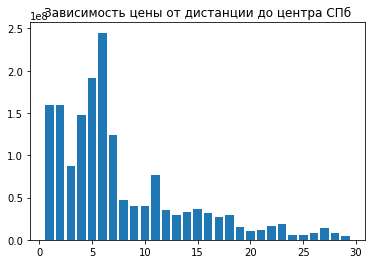

In [62]:
st_data_spb = st_data[st_data['locality_name'] == 'Санкт-Петербург']
st_data_spb.loc[st_data_spb['cityCenters_distance_km'] < 1, 'cityCenters_distance_km'] = 1
st_data_spb['km_outCentre_price'] = (st_data_spb['last_price'] / st_data_spb['cityCenters_distance_km'])
print('Средняя цена килметра расстояния до центра:', st_data_spb['km_outCentre_price'].median(), 'руб')

plt.bar(st_data_spb['cityCenters_distance_km'], st_data_spb['last_price'])
plt.title('Зависимость цены от дистанции до центра СПб')
plt.show()

На расстоянии до 10 км близости к центру цены явно выше чем у остальных (но при этом зависимость не совсем линейная - есть выбивающиеся значения, когда на расстоянии 4-7 км цены больше, чем на 1-3 км - в шести километрах примерно можно наблюдать второй пик). Далее зависимость становится более линейной и практически всегда с каждыми 2-3 километрами отдаления цена падает. В 20 км отличие цены от ближайших к центру квартир составляет уже 2, 3 раза.

# Общий вывод

Выявив и избавившись от выбросов (такие значения были в столбцах цены, высоты потолков, общей площади), мы проверили предобработку данных. В большинстве своем здесь мы пользовались прямой заменой пропусков на подходящие по смыслу значения и категоризовали данные. Например разбили населенные пункты на группы, предварительно избавившись от неявных дубликатов с помощью метода `.apply()`, написав соотв-ие функции. Также была произведена категоризация квартир по площади на пять групп от очень маленьких до огромных. При заполнении пропусков в параметре "высота потолков", была использована интересная связка группировки и вышеупомянутого метода `.apply()`, при помощи чего удалось заполнять пропуски не одним медианным значением, а характерным для конкретной группы по общей площади (ранее мы установили среднюю линейную корреляцию высоты потолков с этим параметров). Далее, применив, такую связку методов к ряду параметров, которые требовалось изучить подробнее было установлено что:
- больше всего на продажу выставляются квартиры общим метражом от 35 до 60 $м^2$, а большинство всех значений из выборки лежат в пределах 80 $м^2$;
- площадь кухлнь чаще всего составляет до 20 $м^2$;
- большинство квартир лежат в диапазоне цен **от 2,5 до 7,5 млн. При этом цена в деревнях и поселках на схожую по площади недвижимсоть ниже в диапазоне от 3 до 10 млн, чем в городах, что весьма существенно. Это можно сказать и о других типах по площади. Цена квартир средней площади дешевле больших в 1,5 - 2 раза.**;
- объвлений по "дргим" типам этажей явно больше в два-три раза, чем по первому и последнему вместе взятым;
- летом (и в выходные) объявлений выкладывается меньше всего (в январе месяце тоже очень мало);
- маленькие или очень маленькие квартиры продаются в среднем раза в два быстрее;
- самая высокая взаимосвязь у цены квартир с их общей площадью;
- средняя стоимость квадратного метра жилья в топ-10 нас. пунтках - чуть более 100 тыс рублей;
- ценник на первый и последний этажи раза в 1,5 меньше, чем на другие;
- чем ближе мы приближаемся к центру СПБ тем выше цена квартир и тем стремительнее ее рост на многие из них.


